# Aufgabe 2: Lineare Regression mit QR

Berechnen Sie die (dünne) QR-Zerlegung der Matrix
$$
\mathbf{X} = \begin{bmatrix}
    1 &1 \\
    1 &2 \\
    1 &2 \\
    1 &5
\end{bmatrix}
$$

Berechnen Sie anschließend damit eine Regressionsgerade $g(x) = b + wx$ für die Daten

| x | y |
|---|---|
| 1 | -2 |
| 2 | -1 |
| 2 | 1 |
| 5 | 6 |

## (dünne) QR-Zerlegung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

X = np.stack([np.ones(4), [1, 2, 2, 5]]).T

In [2]:
Q, R = np.linalg.qr(X, mode='reduced')

# Anpassung zum Seminar (wäre nicht nötig gewesen)
Q = -1 * Q
R = -1 * R

print(Q)
print(R)

[[ 0.5    -0.5   ]
 [ 0.5    -0.1667]
 [ 0.5    -0.1667]
 [ 0.5     0.8333]]
[[ 2.  5.]
 [-0.  3.]]


## Regression

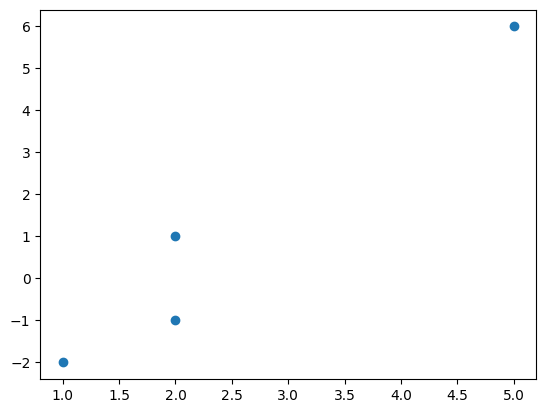

In [3]:
x = np.array([1, 2, 2, 5])
y = np.array([-2, -1, 1, 6])

plt.scatter(x, y)
plt.show()

$$\mathbf{X} = \mathbf{QR} \Rightarrow \mathbf{Rw} = \mathbf{Q}^T \mathbf{y}$$

In [4]:
QTy = Q.T@y
print('QTy =', QTy)

W = np.linalg.solve(R, QTy)
print('W =', W)

QTy = [2. 6.]
W = [-4.  2.]


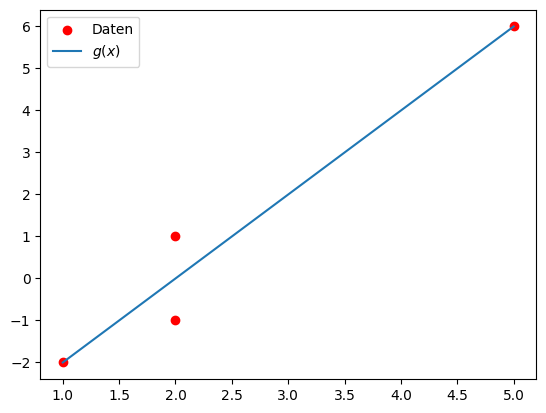

In [5]:
x_plot = np.linspace(x[0], x[-1])

plt.scatter(x, y, color='red', label='Daten')
plt.plot(x_plot, W[0] + W[1] * x_plot, label='$g(x)$')
plt.legend()
plt.show()